## Where does it pay to go to college?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading files
degrees = pd.read_csv('capstone-data/degrees-that-pay-back.csv')
college = pd.read_csv('capstone-data/salaries-by-college-type.csv')
region = pd.read_csv('capstone-data/salaries-by-region.csv')

### Describe the dataset

In [3]:
college.describe()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269,269,269,269,231,269,269,231
unique,249,5,145,168,141,178,110,98
top,"University of Alabama, Tuscaloosa",State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,2,175,7,5,6,6,11,8


In [4]:
#Renaming columns
college.columns = ['name', 'type','start_med', 'mid_med', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']
college.head()

,name,type,start_med,mid_med,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [5]:
# What types of colleges are listed?
college.type.unique()

array(['Engineering', 'Party', 'Liberal Arts', 'Ivy League', 'State'], dtype=object)

In [6]:
#Changing strings to ints for analysis

dollar_cols = ['start_med', 'mid_med', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

for x in dollar_cols:
    college[x] = college[x].str.replace("$","")
    college[x] = college[x].str.replace(",","")
    college[x] = pd.to_numeric(college[x])

college.head()

,name,type,start_med,mid_med,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


### Analysis

#### How do starting median salaries compare between the different types of colleges?

In [7]:
# Comparing starting median salaries by type
college.groupby('type').describe()

mid_med                                                   \
               count           mean           std       min       25%   
type                                                                    
Engineering     19.0  103842.105263  13840.733594   80000.0   94400.0   
Ivy League       8.0  120125.000000  10412.046594  107000.0  109750.0   
Liberal Arts    47.0   89378.723404  12318.172086   63900.0   80850.0   
Party           20.0   84685.000000   7237.568289   73000.0   79350.0   
State          175.0   78567.428571  10296.072330   43900.0   71800.0   

                                           mid_p10                 ...     \
                   50%       75%       max   count          mean   ...      
type                                                               ...      
Engineering   106000.0  114000.0  126000.0    15.0  61793.333333   ...      
Ivy League    122000.0  127250.0  134000.0     8.0  57900.000000   ...      
Liberal Arts   85800.0  101500.0  110000.0    14.0  47478.571429   ...      
Party          84050.0   88975.0   96100.0    19.0  44052.631579   ...      
State          78500.0   84450.0  112000.0   175.0  41886.285714   ...      

               mid_p90           start_med                             \
                   75%       max     count          mean          std   
type                                                                    
Engineering   187500.0  220000.0      19.0  59057.894737  7842.924326   
Ivy League    296250.0  326000.0       8.0  60475.000000  3218.584427   
Liberal Arts  214000.0  265000.0      47.0  45746.808511  4368.854743   
Party         175000.0  209000.0      20.0  45715.000000  3685.715670   
State         161500.0  215000.0     175.0  44126.285714  4269.067495   

                                                           
                  min      25%      50%      75%      max  
type                                                       
Engineering   46200.0  53250.0  58300.0  62000.0  75500.0  
Ivy League    56200.0  58825.0  59850.0  61525.0  66500.0  
Liberal Arts  38500.0  42250.0  45500.0  48600.0  54500.0  
Party         41300.0  42500.0  44600.0  47975.0  52900.0  
State         34800.0  41400.0  43600.0  46300.0  59900.0  

[5 rows x 48 columns]

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


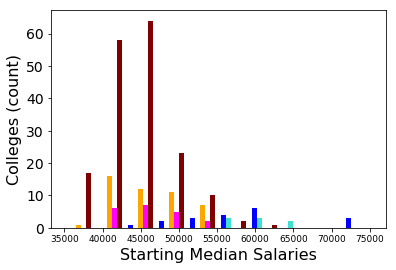

In [27]:
# Let's see it in histogram form

Eng = college[college['type'] == "Engineering"]['start_med']
Ivy = college[college['type'] == "Ivy League"]['start_med']
LibArts = college[college['type'] == "Liberal Arts"]['start_med']
Party = college[college['type'] == "Party"]['start_med']
State = college[college['type'] == "State"]['start_med']

start_med_hist = plt.hist([Eng, Ivy, LibArts, Party, State], color = ['blue','turquoise', 'orange', 'magenta','maroon'])

plt.xlabel("Starting Median Salaries", fontsize=16)  
plt.ylabel("Colleges (count)", fontsize=16)
plt.xticks(fontsize=9)  
plt.yticks(fontsize=14)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


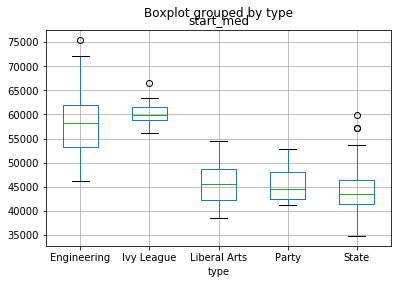

In [9]:
# Boxplots of starting median salaries by type of college.

start_med_boxplt = college.boxplot('start_med',by='type')

Engineering schools have the most range with starting median salaries, implying that where an engineering student goes to school matters more than the other types of colleges.  Ivy leagues have less variation in terms of starting salaries and the highest mean starting median salary. Where you go within the Ivy League system matters less when looking at starting median salaries. Liberal Arts, Party and State schools have similar mean median starting salaries, with more variation in state schools.  State schools also has the largest count compared to the other schools, as seen in the histogram. This may account for the variation.

#### Is there a significant difference in mean starting median salary between Liberal Arts, Party and State schools?

ValueError: x and y must have same first dimension, but have shapes (20,) and (19, 8)

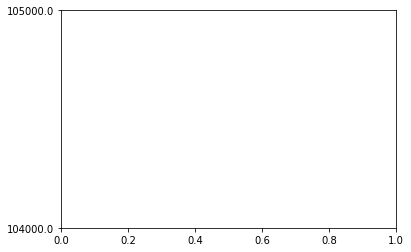

In [10]:
#To run the ANOVA test, we want to check for normality in the data.

norm = np.random.normal(0,1,20)
norm.sort()

Eng = college[college['type'] == 'Engineering']
Eng['start_med'].sort_values()

plt.plot(norm, Eng, "x")

#### How do the differences between college types change when looking at mid-career salaries?

In [28]:
# Let's run the histogram of the mid-career salaries for each type of college.

Eng2 = college[college['type'] == "Engineering"]['mid_med']
Ivy2 = college[college['type'] == "Ivy League"]['mid_med']
LibArts2 = college[college['type'] == "Liberal Arts"]['mid_med']
Party2 = college[college['type'] == "Party"]['mid_med']
State2 = college[college['type'] == "State"]['mid_med']

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


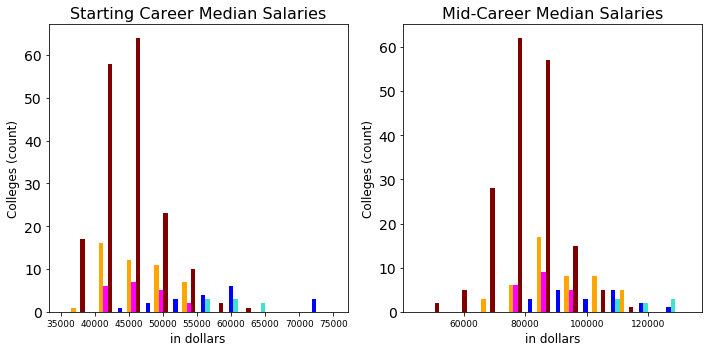

In [29]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
start_med_hist = plt.hist([Eng, Ivy, LibArts, Party, State], color = ['blue','turquoise', 'orange', 'magenta','maroon'])
plt.title('Starting Career Median Salaries', fontsize=16)
plt.xlabel("in dollars", fontsize=12)  
plt.ylabel("Colleges (count)", fontsize=12)
plt.xticks(fontsize=9)  
plt.yticks(fontsize=14)

plt.subplot(1, 2, 2)
mid_career_hist = plt.hist([Eng2, Ivy2, LibArts2, Party2, State2], color = ['blue', 'turquoise', 'orange', 'magenta', 'maroon'])
plt.title('Mid-Career Median Salaries', fontsize=16)
plt.xlabel("in dollars", fontsize=12)  
plt.ylabel("Colleges (count)", fontsize=12)
plt.xticks(fontsize=9)  
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


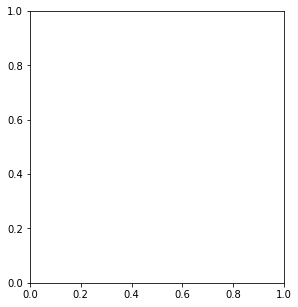

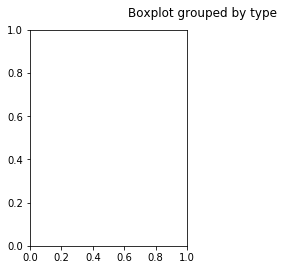

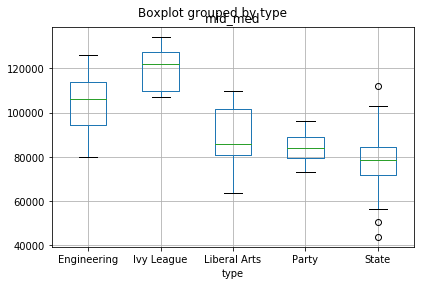

In [32]:
# Boxplots of starting median salaries by type of college.

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
college.boxplot('start_med', by = 'type')

plt.subplot(1,2,1)
college.boxplot('mid_med', by='type')

plt.tight_layout()
plt.show()

### Conclusions


### Further Research

The current analysis does not consider the cost of tuition and student loans.  Ivy leagues, for example, have higher sticker prices than a state school might.  How long does it take a student of each type school to earn back the cost of tuition?  If we consider the median student loan amounts, how would the conclusions change?  Analysis into tuition and student loans would require gathering more data through APIs and/or web-scraping.

It would also be interesting to consider the majors.  Is a Party school engineering student doing better than an Ivy League Art History major?  We could apply linear regression models to determine what factors result in the highest starting and mid-career salaries.  

